# Linear Regression
In this laboratory, we target on DNN architecture and implementation experiences. A model, designed and investigated in a variety of configurations, is implemented to predict car price in the data set.

## Data Preprocessing
In this section, we need to download samples of the data set, transform their structures into vectors, and then prepare 3 subsets, including training, validation, and test sets.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

print(tf.__version__)

2.9.1


First import the dataset using *pandas*:

In [3]:
dataset = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
dataset.duplicated().all()

False

In [7]:
dataset = dataset.drop('car_ID',axis=1)

In [8]:
dataset.shape

(205, 25)

In [9]:
def car_name(x):
    carname  = x.split(' ')[0]
    return carname

In [10]:
dataset['CarName']   = dataset['CarName'].apply(car_name)
dataset['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Label encode the values in the columns which is categorical

In [11]:
quanlitative = [f for f in dataset.columns if dataset.dtypes[f] == 'object']
le = LabelEncoder()
for col in quanlitative:
    dataset[col] = le.fit_transform(dataset[col])

In [12]:
y = dataset['price']
X = dataset.drop(['price'],axis=1)

## Split the data
After preprocessing samples, we need to divide into subsets, including

Training set: calculate gradients, update weights
Validation set: monitor network performance during training phase and trigger termination
Test set: evaluate network performance using un-seen samples (samples are never seen by the network yet)
To be simple, we split 20% of the training set to obtain the validation set. Please note that samples are collected randomly, not in consecutive block.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
print(X_train.shape, y_train.shape)

(164, 24) (164,)


## The Normalization layer
The Normalization is a clean and simple way to add feature normalization into your model.

The first step is to create the layer:

In [15]:
normalizer = Normalization(axis=-1)

Then, fit the state of the preprocessing layer to the data by calling Normalization.adapt:

In [16]:
normalizer.adapt(np.array(X_train))

## Regression using a DNN

In [17]:
...
def build_and_compile_model():
  model = Sequential()
  model.add(normalizer)
  model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error',
                optimizer=Adam(0.1))
  return model

In [18]:
dnn_model = build_and_compile_model()

In [19]:
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 24)               49        
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                1600      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                        

## Callbacks: Early Stopping, Model Checkpoint
How many epochs should we train the network to obtain a "good" performance, 10, 20, 30, etc. ? \
--> Apply Early Stopping to track the performance in validation set during the training phase, and terminate it when the performance stops improving.

Moreover, we should save the model when it reach the highest performance in the training phase. Otherwise, we get the latest weights (after the last epoch) that maybe not the best ones.

In [20]:
early_stopping_cb = EarlyStopping(
    monitor='val_loss', # track the validation accuracy
    patience=3, # val_loss doesn't improve after 3 consecutive epochs, stop!
    verbose=1)

model_checkpoint_cb = ModelCheckpoint(
    'model_checkpoint', 
    monitor='val_loss', # track val_loss
    verbose=1, 
    save_best_only=True,    # overwrite saved model, keep only the best one
    )

In [21]:
history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=1, epochs=100, batch_size = 2,
    callbacks=[early_stopping_cb, model_checkpoint_cb])

Epoch 1/100
47/66 [====================>.........] - ETA: 0s - loss: 135001184.0000 
Epoch 1: val_loss improved from inf to 34102384.00000, saving model to model_checkpoint
INFO:tensorflow:Assets written to: model_checkpoint\assets
66/66 [==============================] - 1s 15ms/step - loss: 118371040.0000 - val_loss: 34102384.0000
Epoch 2/100
49/66 [=====================>........] - ETA: 0s - loss: 45804972.0000
Epoch 2: val_loss improved from 34102384.00000 to 28214966.00000, saving model to model_checkpoint
INFO:tensorflow:Assets written to: model_checkpoint\assets
66/66 [==============================] - 1s 13ms/step - loss: 46255200.0000 - val_loss: 28214966.0000
Epoch 3/100
53/66 [=======================>......] - ETA: 0s - loss: 53359228.0000
Epoch 3: val_loss did not improve from 28214966.00000
66/66 [==============================] - 0s 1ms/step - loss: 50135792.0000 - val_loss: 37633640.0000
Epoch 4/100
52/66 [======================>.......] - ETA: 0s - loss: 55306132.0000
E

In [22]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [price]')
  plt.legend()
  plt.grid(True)

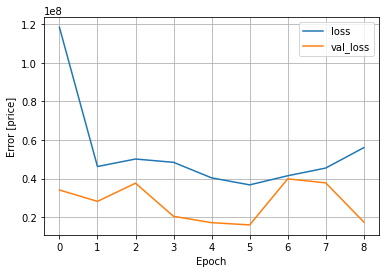

In [23]:
plot_loss(history)

## Evaluation phase
Now, evaluate the pre-trained network in test set.

In [24]:
dnn_model.evaluate(X_test, y_test, verbose=0)

13130170.0

## Make predictions
You can now make predictions with the dnn_model on the test set using Keras Model.predict and review the loss

2/2 [==============================] - 0s 0s/step


Text(0, 0.5, 'Predictions [price]')

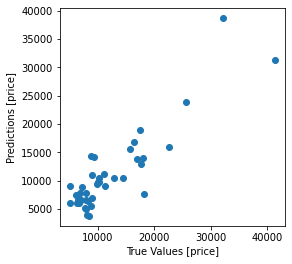

In [25]:
test_predictions = dnn_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [price]')
plt.ylabel('Predictions [price]')
